# Online Retail Sales Data

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas matplotlib seaborn plotly scikit-learn imbalanced-learn plotnine openpyxl

  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
  Using cached plotnine-0.13.6-py3-none-any.whl.metadata (8.9 kB)
  Using cached mizani-0.11.4-py3-none-any.whl.metadata (4.8 kB)
Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)
Using cached plotnine-0.13.6-py3-none-any.whl (1.3 MB)
Using cached mizani-0.11.4-py3-none-any.whl (127 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.spatial.distance import cdist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from plotnine import ggplot, aes, geom_line
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import openpyxl

# Introduction

The purpose of the database is to manage an online retail sales database. It will store information about the products, sales, and the customer.

### Functional Requirements
* Retrieve customer transaction history based on various filters (e.g., date range, customer ID, product category).
* Query product performance metrics such as sales volume, revenue, and discount effectiveness.
* Access customer demographic information (e.g., age group, payment method preferences).
* Retrieve sales trend data over specific time periods for forecasting and analysis.
* Perform customer segmentation based on purchasing behavior and demographics.
* Analyze the effectiveness of different discount strategies on sales.
* The database itself should not perform advanced predictive modeling (e.g., machine learning model training and inference); this should be done in external tools like Python or R.
* The database is not designed for real-time data processing or streaming analytics; it should handle batch processing and periodic updates.
* Users should not be able to execute complex multi-step transactions that require extensive transaction management and rollback capabilities (e.g., multi-phase commits).

# Methods

### Loading Data

In [4]:
#Load data from a csv file

df = pd.read_csv('1SQL.csv')
print(df.head())

   Order_id    Purchase_time  Customer_id Product_category  Quantity   Price  \
0         1  2020/8/15 12:50            1   Home & Kitchen         3  394.67   
1         2  2020/8/16 12:50            2   Home & Kitchen         1  372.39   
2         3  2020/8/17 12:50            3   Home & Kitchen         7  243.14   
3         4  2020/8/18 12:50            4   Home & Kitchen         2   50.23   
4         5  2020/8/19 12:50            5   Home & Kitchen         2   60.82   

  Payment_method  Customer_age Customer_gender Customer_location  \
0      Gift Card            34          Female            Africa   
1    Credit Card            34            Male         Australia   
2    Credit Card            34           Other     North America   
3    Credit Card            34          Female         Australia   
4    Credit Card            34           Other         Australia   

   Full_purchase_amount  Discount Customer_income  Is_holiday  Unnamed: 14  \
0                698.57      0.1

### Data wrangling & cleaning

In [5]:
# Display the shape of the dataset
print("Dataset shape:", df.shape)

# Summary statistics for numerical features
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Data types of the features
print("\nData Types:")
print(df.dtypes)

Dataset shape: (301425, 17)

Summary Statistics:
            Order_id    Customer_id       Quantity          Price  \
count  301425.000000  301425.000000  301425.000000  301425.000000   
mean   150713.000000  150713.000000       4.400647     252.397732   
std     87014.046783   87014.046783       2.778290     142.712736   
min         1.000000       1.000000       1.000000       5.000000   
25%     75357.000000   75357.000000       2.000000     129.250000   
50%    150713.000000  150713.000000       4.000000     252.110000   
75%    226069.000000  226069.000000       7.000000     375.450000   
max    301425.000000  301425.000000       9.000000     499.990000   

        Customer_age  Full_purchase_amount       Discount     Is_holiday  \
count  301425.000000         301425.000000  301425.000000  301425.000000   
mean       34.693476           1055.010118       0.132933       0.148063   
std        14.377372            950.932588       0.078924       0.355163   
min        15.000000     

In [6]:
# Remove the unwanted columns
df = df.drop(columns=['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'])

# Verify the columns have been removed by displaying the DataFrame's first few rows
print(df.head())

   Order_id    Purchase_time  Customer_id Product_category  Quantity   Price  \
0         1  2020/8/15 12:50            1   Home & Kitchen         3  394.67   
1         2  2020/8/16 12:50            2   Home & Kitchen         1  372.39   
2         3  2020/8/17 12:50            3   Home & Kitchen         7  243.14   
3         4  2020/8/18 12:50            4   Home & Kitchen         2   50.23   
4         5  2020/8/19 12:50            5   Home & Kitchen         2   60.82   

  Payment_method  Customer_age Customer_gender Customer_location  \
0      Gift Card            34          Female            Africa   
1    Credit Card            34            Male         Australia   
2    Credit Card            34           Other     North America   
3    Credit Card            34          Female         Australia   
4    Credit Card            34           Other         Australia   

   Full_purchase_amount  Discount Customer_income  Is_holiday  
0                698.57      0.15         0-25

In [7]:
#Make required changes after seeing the features 
# Convert 'Purchase_time' to datetime format
df['Purchase_time'] = pd.to_datetime(df['Purchase_time'], format='%Y/%m/%d %H:%M')

# Check the data type to confirm the conversion
print(df['Purchase_time'].dtypes)

datetime64[ns]


### Feature Engineering

In [8]:
# Convert datetime to more specific time-based features 
df['Year'] = df['Purchase_time'].dt.year
df['Month'] = df['Purchase_time'].dt.month
df['Day'] = df['Purchase_time'].dt.day
df['Hour'] = df['Purchase_time'].dt.hour
df['Weekday'] = df['Purchase_time'].dt.weekday

#Group age to bins
bins = [0, 20, 30, 40, 50, 60, 87]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-87']
df['Age_Range'] = pd.cut(df['Customer_age'], bins=bins, labels=labels, right=False)

# Now use 'Age_Range' in clustering instead of 'Customer_age'
# Adjust clustering process accordingly


# Ordinal encoding of categorical data 
product_category_encoder = LabelEncoder()
payment_method_encoder = LabelEncoder()
customer_location_encoder = LabelEncoder()
customer_gender_encoder = LabelEncoder()
customer_income_encoder = LabelEncoder()
age_range_encoder = LabelEncoder()

df['Product_category_encoded'] = product_category_encoder.fit_transform(df['Product_category'])
df['Payment_method_encoded'] = payment_method_encoder.fit_transform(df['Payment_method'])
df['Customer_location_encoded'] = customer_location_encoder.fit_transform(df['Customer_location'])
df['Customer_gender_encoded'] = customer_gender_encoder.fit_transform(df['Customer_gender'])
df['Customer_income_encoded'] = customer_income_encoder.fit_transform(df['Customer_income'])
df['Age_encoded'] = age_range_encoder.fit_transform(df['Age_Range'])

### Data Exploration

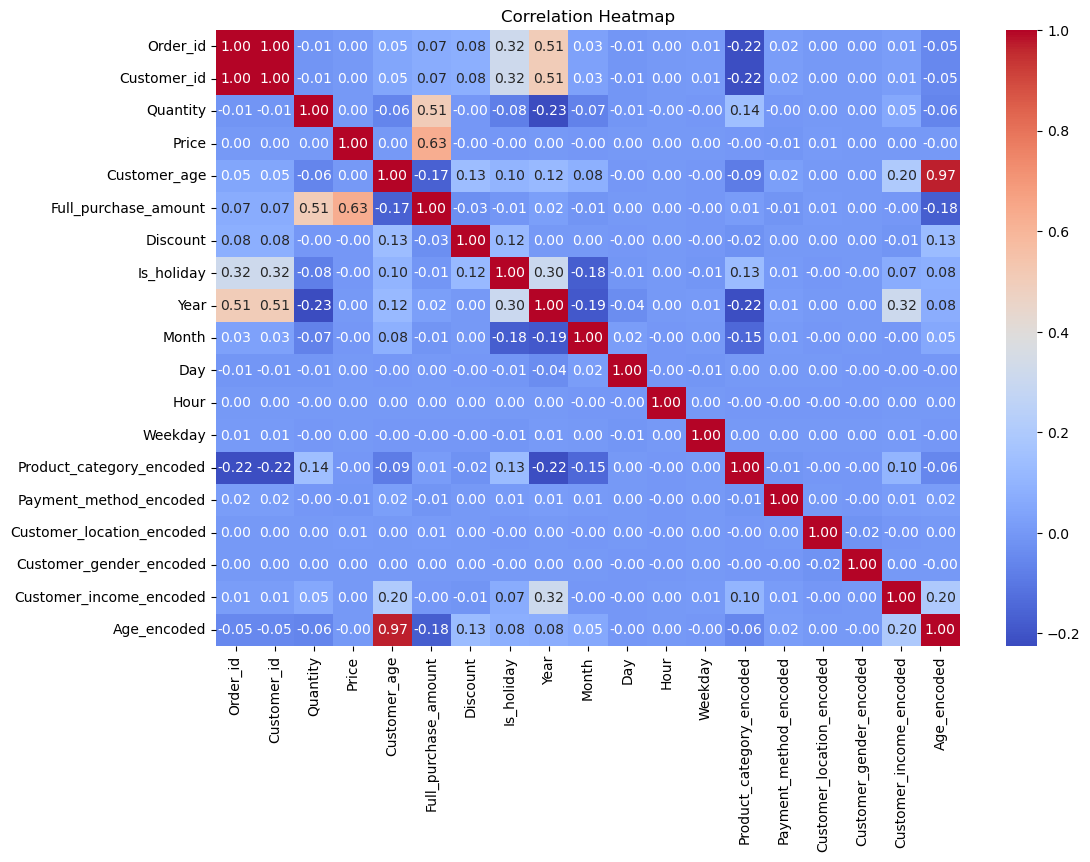

In [9]:
# Display heatmap to examine correlation 
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

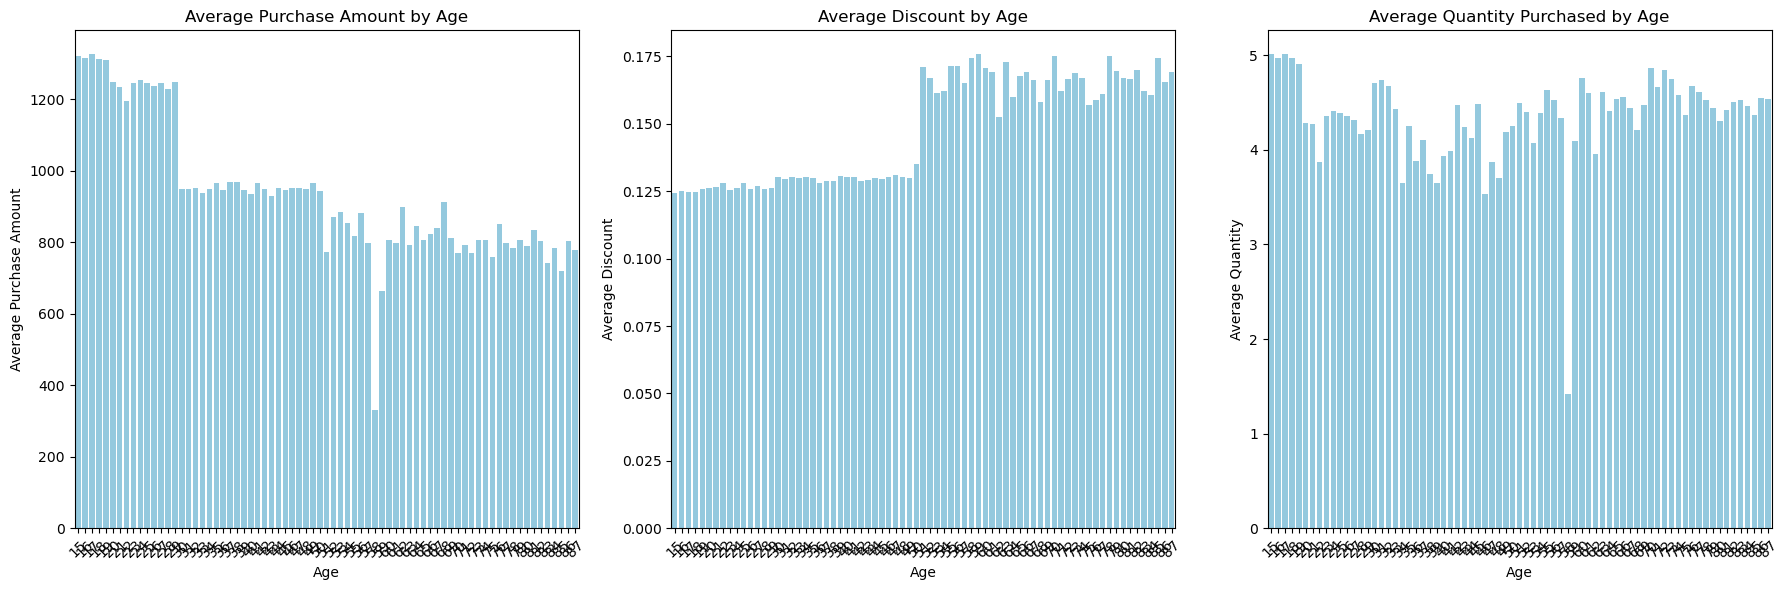

In [10]:
# Visualize Variable to select areas of interest 

#Subplots for Age vs. Purchase Amount, Discount, and Quantity 
age_summary = df.groupby('Customer_age').agg({
    'Full_purchase_amount': 'mean',
    'Discount': 'mean',
    'Quantity': 'mean'
}).reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Subplot 1: Age vs. Purchase Amount
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.barplot(data=age_summary, x='Customer_age', y='Full_purchase_amount', color='skyblue')
plt.title('Average Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)

# Subplot 2: Age vs. Discount
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.barplot(data=age_summary, x='Customer_age', y='Discount', color='skyblue')
plt.title('Average Discount by Age')
plt.xlabel('Age')
plt.ylabel('Average Discount')
plt.xticks(rotation=45)

# Subplot 3: Age vs. Quantity
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.barplot(data=age_summary, x='Customer_age', y='Quantity', color='skyblue')
plt.title('Average Quantity Purchased by Age')
plt.xlabel('Age')
plt.ylabel('Average Quantity')
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

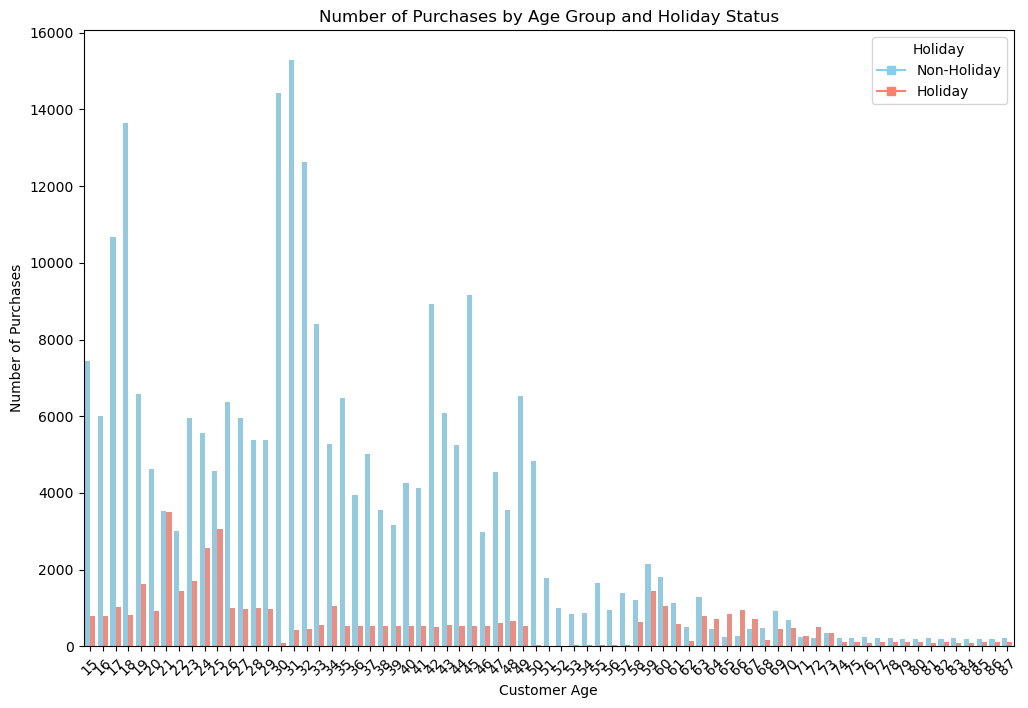

In [11]:
# Group by 'Customer_age' and 'Is_holiday', then count the 'Order_id'
age_holiday_purchases = df.groupby(['Customer_age', 'Is_holiday'])['Order_id'].count().reset_index()
age_holiday_purchases.rename(columns={'Order_id': 'Full_purchase_amount'}, inplace=True)

# Sort the DataFrame by 'Customer_age'
age_holiday_purchases = age_holiday_purchases.sort_values('Customer_age')

# Define the order of ages for the x-axis
age_order = sorted(age_holiday_purchases['Customer_age'].unique())

# Define color palette for hue
palette_colors = {False: 'skyblue', True: 'salmon'}  # False for Non-Holiday, True for Holiday

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=age_holiday_purchases, x='Customer_age', y='Full_purchase_amount', hue='Is_holiday',
            palette=palette_colors, order=age_order)
plt.title('Number of Purchases by Age Group and Holiday Status')
plt.xlabel('Customer Age')
plt.ylabel('Number of Purchases')

# Manually defining legend handles and labels
handles, labels = ax.get_legend_handles_labels()
labels = ['Non-Holiday', 'Holiday']
colors = ['skyblue', 'salmon']
new_handles = [plt.Line2D([], [], color=colors[i], marker='s') for i in range(len(handles))]
plt.legend(handles=new_handles, labels=labels, title='Holiday')
plt.xticks(rotation=45) 
plt.show()


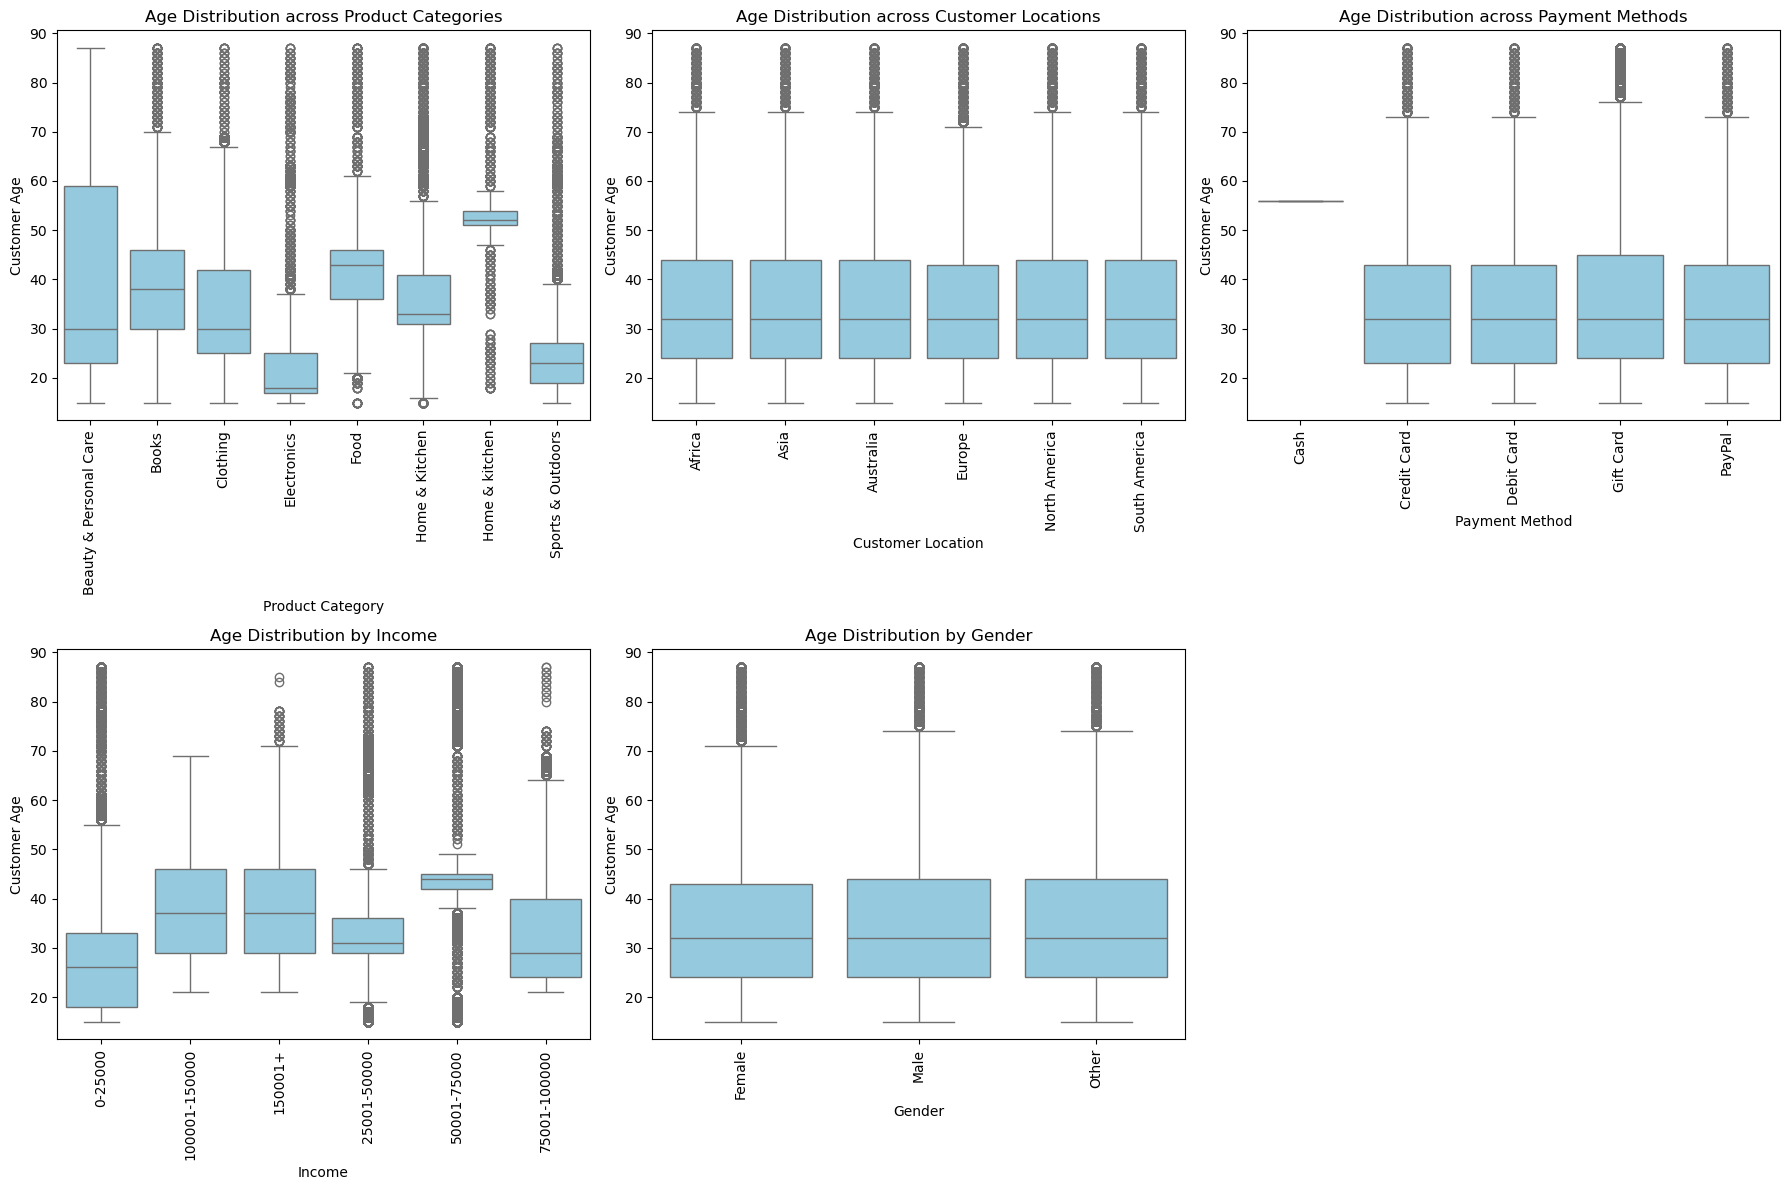

In [12]:
#Store the LabelEncoder for each categorical variable
label_encoders = {}
categories = ['Product_category', 'Payment_method', 'Customer_location', 'Customer_gender', 'Customer_income']

for cat in categories:
    le = LabelEncoder()
    df[cat + '_encoded'] = le.fit_transform(df[cat])
    label_encoders[cat] = le

#Plot
plt.figure(figsize=(18, 12))

# Subplot 1: Age vs. Product Category
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='Product_category_encoded', y='Customer_age', color='skyblue')
plt.title('Age Distribution across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Customer Age')
plt.xticks(range(len(label_encoders['Product_category'].classes_)), label_encoders['Product_category'].inverse_transform(range(len(label_encoders['Product_category'].classes_))), rotation=90)

# Subplot 2: Age vs. Customer Location
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='Customer_location_encoded', y='Customer_age', color='skyblue')
plt.title('Age Distribution across Customer Locations')
plt.xlabel('Customer Location')
plt.ylabel('Customer Age')
plt.xticks(range(len(label_encoders['Customer_location'].classes_)), label_encoders['Customer_location'].inverse_transform(range(len(label_encoders['Customer_location'].classes_))), rotation=90)

# Subplot 3: Age vs. Payment Method
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Payment_method_encoded', y='Customer_age', color='skyblue')
plt.title('Age Distribution across Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Customer Age')
plt.xticks(range(len(label_encoders['Payment_method'].classes_)), label_encoders['Payment_method'].inverse_transform(range(len(label_encoders['Payment_method'].classes_))), rotation=90)

# Subplot 4: Age vs. Income
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Customer_income_encoded', y='Customer_age', color='skyblue')
plt.title('Age Distribution by Income')
plt.xlabel('Income')
plt.ylabel('Customer Age')
plt.xticks(range(len(label_encoders['Customer_income'].classes_)), label_encoders['Customer_income'].inverse_transform(range(len(label_encoders['Customer_income'].classes_))), rotation=90)

# Subplot 5: Age vs. Gender
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='Customer_gender_encoded', y='Customer_age', color='skyblue')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Customer Age')
plt.xticks(range(len(label_encoders['Customer_gender'].classes_)), label_encoders['Customer_gender'].inverse_transform(range(len(label_encoders['Customer_gender'].classes_))), rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Customer Segmentation (Unsupervised Learning)

In [13]:
#Normalize data
from sklearn.preprocessing import StandardScaler

# Selecting the data
data_to_cluster = df[['Full_purchase_amount', 'Age_encoded', 'Product_category_encoded']]

# Normalizing the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_to_cluster)

In [14]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3,  n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(data_normalized)

# Adding the cluster labels to your DataFrame for later analysis
df['Cluster_Labels'] = cluster_labels

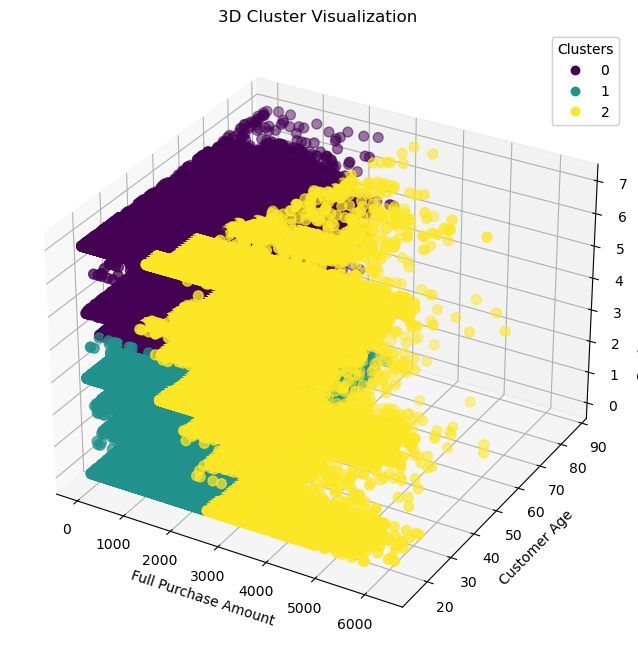

In [15]:
#Visualize the graph 

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Full_purchase_amount'],
                     df['Customer_age'],
                     df['Product_category_encoded'],
                     c=df['Cluster_Labels'], s=50, cmap='viridis')

# Adding labels and title
ax.set_xlabel('Full Purchase Amount')
ax.set_ylabel('Customer Age')
ax.set_zlabel('Product Category Encoded')
ax.set_title('3D Cluster Visualization')

# Legend for clusters
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


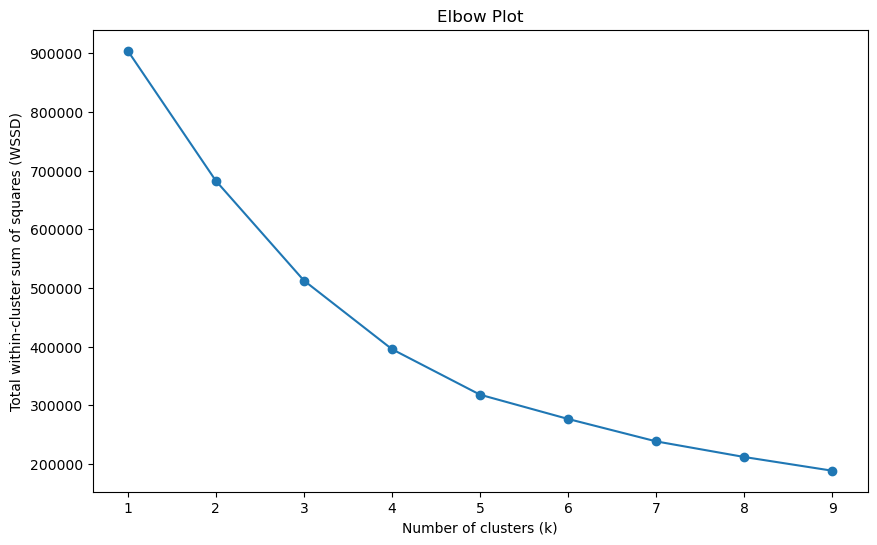

In [16]:
#Visualize elbow graph to identify optimal k

wssd = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data_normalized)
    wssd.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to their closest cluster center

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), wssd, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Total within-cluster sum of squares (WSSD)')
plt.xticks(range(1, 10))
plt.show()

In [17]:
optimal_k = 4
final_kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
final_kmeans.fit(data_normalized)
df['Optimal_Cluster_Labels'] = final_kmeans.labels_

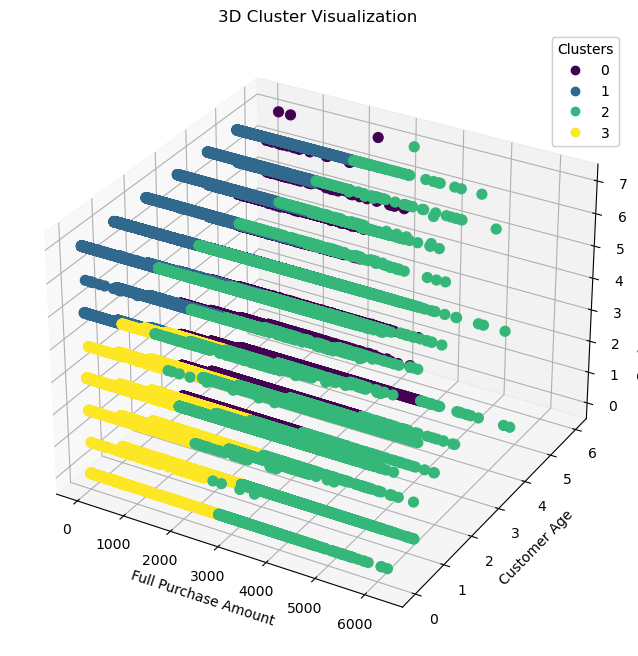

In [18]:
#Visualize the clusters with the optimal k

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Full_purchase_amount'],
                     df['Age_encoded'],
                     df['Product_category_encoded'],
                     c=df['Optimal_Cluster_Labels'], s=50, cmap='viridis', depthshade=False)

# Adding labels and title
ax.set_xlabel('Full Purchase Amount')
ax.set_ylabel('Customer Age')
ax.set_zlabel('Product Category Encoded')
ax.set_title('3D Cluster Visualization')

# Legend for clusters
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

In [19]:
## Display summary statistics of the model

# Suppose this is the initial fitting of the encoder
label_encoder = LabelEncoder()
df['Product_category_encoded'] = label_encoder.fit_transform(df['Product_category'])
df['Age_encoded'] = label_encoder.fit_transform(df['Age_Range'])

# Check what categories are transformed to ensure correct mapping
print("Encoded categories:", label_encoder.classes_)

# Define a custom function to find the top two frequent categories and return their names as a single string
def top_two_modes(encoder, x):
    counts = x.value_counts()
    top_modes_indices = counts.nlargest(2).index.tolist()
    if len(top_modes_indices) < 2:
        top_modes_indices.append(np.nan)  # Append NaN if there's less than 2 unique values
    # Decode the top two modes to return the category names
    top_modes_names = encoder.inverse_transform([int(i) for i in top_modes_indices if pd.notna(i)])
    # Join the top two modes with a comma
    return ', '.join(top_modes_names)
    
# Aggregations for the groupby operation
aggregations = {
    'Full_purchase_amount': [lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)],
    'Product_category_encoded': lambda x: top_two_modes(product_category_encoder, x),
    'Age_encoded': lambda x: top_two_modes(age_range_encoder, x)  # if you also want to get mode info for age ranges
}


# Apply custom aggregation rules
cluster_summary = df.groupby('Optimal_Cluster_Labels').agg(aggregations)

# Flatten the column names if necessary
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]

print(cluster_summary)

Encoded categories: ['0-20' '21-30' '31-40' '41-50' '51-60' '61-87' nan]
                        Full_purchase_amount_<lambda_0>  \
Optimal_Cluster_Labels                                    
0                                             217.29940   
1                                             250.85000   
2                                            2118.91680   
3                                             307.16784   

                        Full_purchase_amount_<lambda_1>  \
Optimal_Cluster_Labels                                    
0                                            1134.36810   
1                                            1028.83000   
2                                            3108.33460   
3                                            1203.59172   

                             Product_category_encoded_<lambda>  \
Optimal_Cluster_Labels                                           
0                       Beauty & Personal Care, Home & Kitchen   
1                  

### Sales Prediction (Supervised Learning)

In [20]:
print(df.columns)

Index(['Order_id', 'Purchase_time', 'Customer_id', 'Product_category',
       'Quantity', 'Price', 'Payment_method', 'Customer_age',
       'Customer_gender', 'Customer_location', 'Full_purchase_amount',
       'Discount', 'Customer_income', 'Is_holiday', 'Year', 'Month', 'Day',
       'Hour', 'Weekday', 'Age_Range', 'Product_category_encoded',
       'Payment_method_encoded', 'Customer_location_encoded',
       'Customer_gender_encoded', 'Customer_income_encoded', 'Age_encoded',
       'Cluster_Labels', 'Optimal_Cluster_Labels'],
      dtype='object')


In [21]:
# Correlation matrix to find relevant features

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric data only
correlation_matrix = numeric_df.corr()
print(correlation_matrix['Full_purchase_amount'].sort_values(ascending=False))

Full_purchase_amount         1.000000
Cluster_Labels               0.669365
Price                        0.629578
Quantity                     0.505954
Optimal_Cluster_Labels       0.199750
Customer_id                  0.066948
Order_id                     0.066948
Year                         0.022789
Product_category_encoded     0.012957
Customer_location_encoded    0.006449
Customer_gender_encoded      0.003406
Hour                         0.001570
Day                          0.000694
Weekday                     -0.001134
Customer_income_encoded     -0.002042
Is_holiday                  -0.007550
Payment_method_encoded      -0.009993
Month                       -0.013436
Discount                    -0.031287
Customer_age                -0.167370
Age_encoded                 -0.176713
Name: Full_purchase_amount, dtype: float64


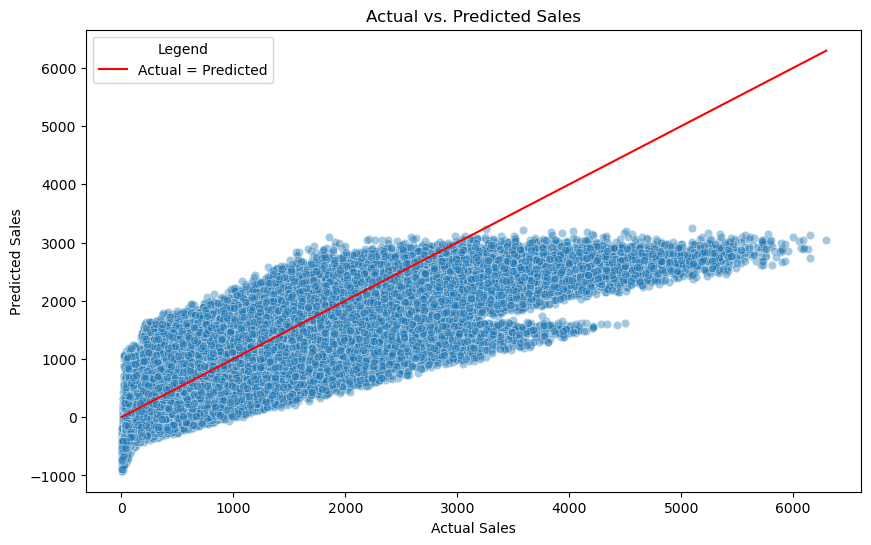

RMSE: 547.6896276861988
Model Coefficients: [ 4.17945906e+00  1.82837090e+02  1.51909593e+02  2.88448061e-01
 -3.22913575e+02 -1.74354714e+01]


In [22]:
#Full sales

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Selecting data for modeling
X = df[['Price', 'Quantity','Year','Hour', 'Discount', 'Is_holiday']]
y = df['Full_purchase_amount']  # Full_purchase_amount is the target (sales)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.4) 
line_range = [y.min(), y.max()]
sns.lineplot(x=line_range, y=line_range, color='red', label='Actual = Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend(title='Legend')  # Adding a legend to clarify the red line
plt.show()

print(f'RMSE: {rmse}')

# Additional insights, if required
print("Model Coefficients:", model.coef_)


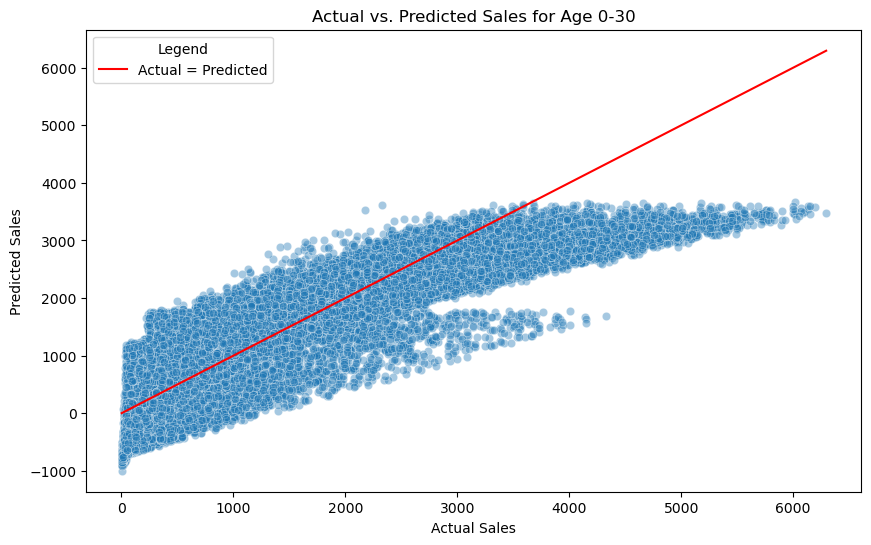

RMSE: 557.1525254418835
Model Coefficients: [ 5.04210244e+00  2.31199085e+02  6.47168614e+01  2.11344987e-01
  6.20861159e+01 -1.33229443e+02]


In [23]:
#Cluster 1

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df_cluster1 = df[df['Age_Range'].isin(['0-20', '21-30'])]

# Selecting data for modeling
X = df_cluster1[['Price', 'Quantity', 'Year', 'Hour', 'Discount', 'Is_holiday']]
y = df_cluster1['Full_purchase_amount']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.4) 
line_range = [y.min(), y.max()]
sns.lineplot(x=line_range, y=line_range, color='red', label='Actual = Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales for Age 0-30')
plt.legend(title='Legend')  # Adding a legend to clarify the red line
plt.show()


print(f'RMSE: {rmse}')

# Additional insights, if required
print("Model Coefficients:", model.coef_)


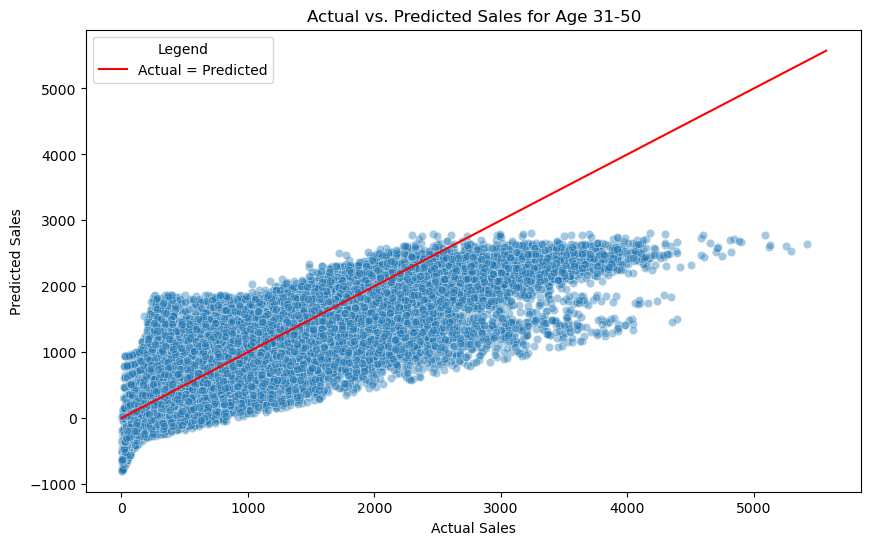

RMSE: 455.9664968360848
Model Coefficients: [ 3.78271077e+00  1.62779354e+02  1.44305116e+02 -2.31843957e-02
 -6.96537189e+00  3.71234608e+02]


In [24]:
#Cluster 2
df_cluster2 = df[df['Age_Range'].isin(['31-40', '41-50'])]

# Selecting data for modeling
X = df_cluster2[['Price', 'Quantity', 'Year', 'Hour', 'Discount', 'Is_holiday']]
y = df_cluster2['Full_purchase_amount']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.4) 
line_range = [y.min(), y.max()]
sns.lineplot(x=line_range, y=line_range, color='red', label='Actual = Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales for Age 31-50')
plt.legend(title='Legend')  # Adding a legend to clarify the red line
plt.show()


print(f'RMSE: {rmse}')

# Additional insights, if required
print("Model Coefficients:", model.coef_)


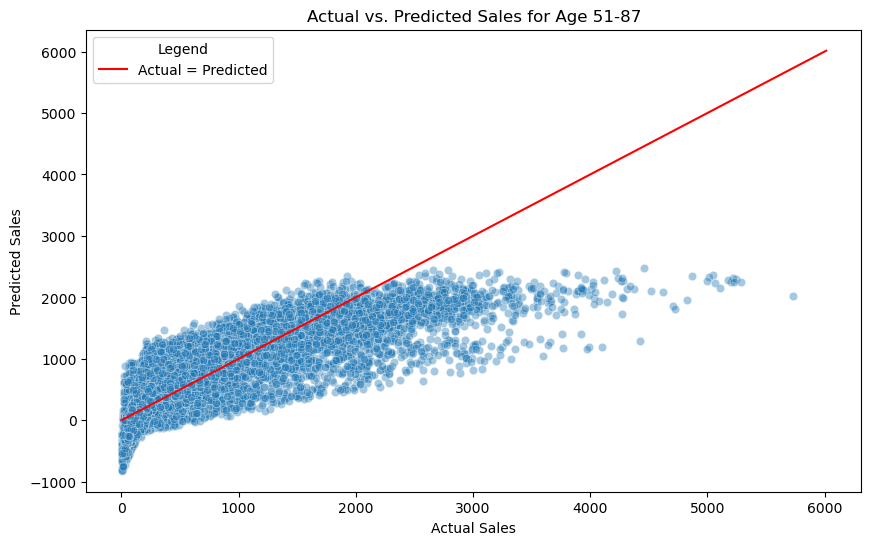

RMSE: 442.501267910898
Model Coefficients: [   3.14272155  141.136128    155.46303609    0.47349456  283.32991325
 -299.44378705]


In [25]:
#Cluster 3
df_cluster3 = df[df['Age_Range'].isin(['51-60', '61-87'])]

# Selecting data for modeling
X = df_cluster3[['Price', 'Quantity', 'Year', 'Hour', 'Discount', 'Is_holiday']]
y = df_cluster3['Full_purchase_amount']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.4) 
line_range = [y.min(), y.max()]
sns.lineplot(x=line_range, y=line_range, color='red', label='Actual = Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales for Age 51-87')
plt.legend(title='Legend')  # Adding a legend to clarify the red line
plt.show()


print(f'RMSE: {rmse}')

# Additional insights, if required
print("Model Coefficients:", model.coef_)
